In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier

# Starting the analysis
1. We start taking a look at the the data trying to see some insights ?
2. At second we see wich model will perform with a better score ?

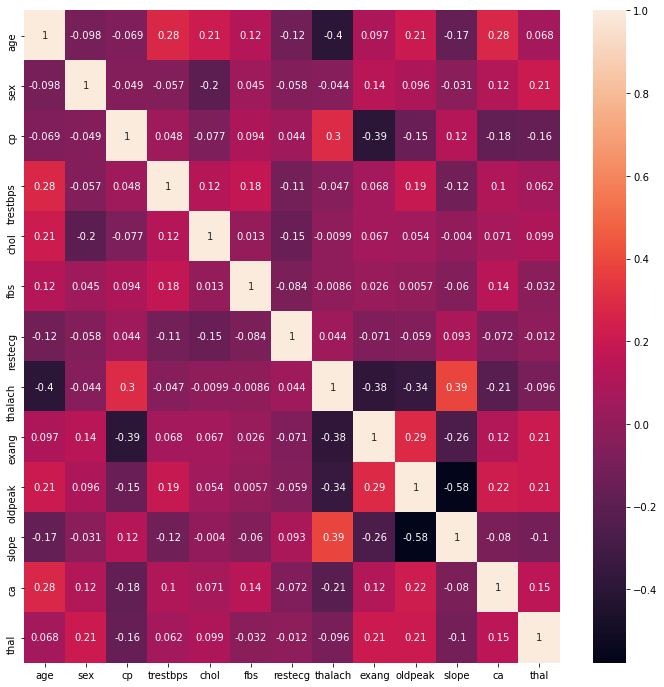

In [2]:
#Parsing and showing data

df=pd.read_csv('../input/heart-disease-uci/heart.csv')

y=df.pop('target')

correlation=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot=True)
plt.show()

In [3]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [4]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


After reading the data let's see what are the number of individuals that are male and female in the dataset

In [5]:
#showing the gender in the data
val=[]
mal=0
fem=0

sex=df['sex']
classes=np.unique(sex)

for c in classes:
    val.append(np.count_nonzero(sex==c))

done this we are going to show the data

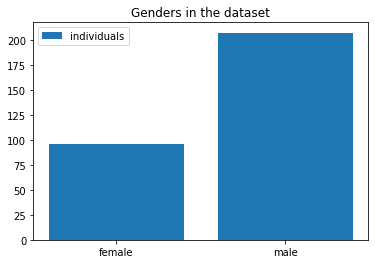

In [6]:
plt.title('Genders in the dataset')
plt.bar(['female','male'],val,label='individuals')
plt.legend()
plt.show()

This data brings another question: What are the distribution between males and females with heart diseases ? Does it follows the same distribution as in the dataset?

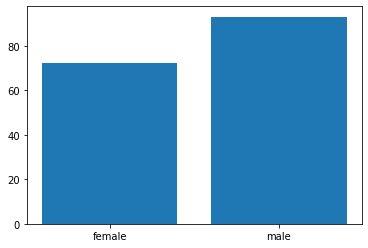

In [7]:
for r in range(len(y)):
    if y[r]==1:
        if sex[r]==1:
            mal+=1
        else:
            fem+=1
plt.bar(['female','male'],[fem,mal])
plt.show()

Now we are going to look at age. Does age has a relation with heart disease. if yes how much? if not why?

The oldest person to have a heart disease has the age of 76
The youngest person to have a heart disease has the age of 29
The oldest person to do not have a heart disease has the age of 77
The youngest person to do not have a heart disease has the age of 35


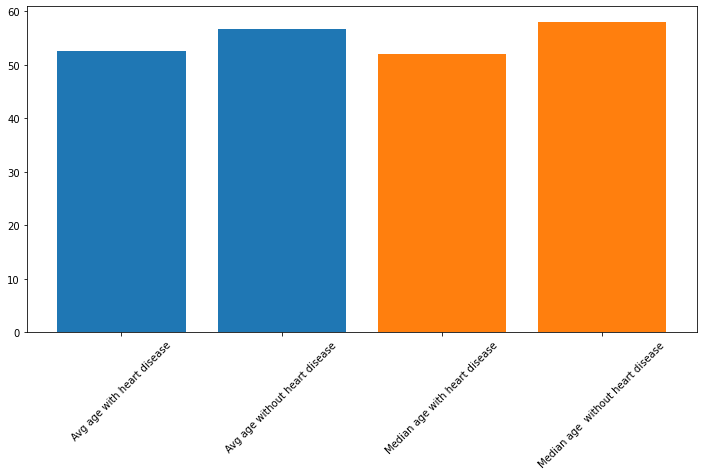

In [8]:
age_with=[]
age_without=[]
for r in range(len(y)):
    if y[r]==1:
        age_with.append(df['age'][r])
    else:
        age_without.append(df['age'][r])

print('The oldest person to have a heart disease has the age of '+str(max(age_with)))
print('The youngest person to have a heart disease has the age of '+str(min(age_with))) 

print('The oldest person to do not have a heart disease has the age of '+str(max(age_without)))
print('The youngest person to do not have a heart disease has the age of '+str(min(age_without))) 
plt.figure(figsize=(12,6))
plt.bar(['Avg age with heart disease','Avg age without heart disease'],[np.mean(age_with),np.mean(age_without)])
plt.bar(['Median age with heart disease','Median age  without heart disease'],[np.median(age_with),np.median(age_without)])
plt.xticks(rotation = 45)
plt.show()

# Now analysing the models 

* We are going to use Diferent regressor models including:
    
    * Gradient Boosting 
    * Multi Layer Perceptron
    * Random Forest Classifier 
    * Naive Bayes
    * KNeighboards
    * AdaBoost 
    * Gaussian Process
    * Random Forest 

In [9]:
X=df.values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20)

model=GradientBoostingClassifier()
model.fit(X_train,y_train)

print(str(model.score(X_test,y_test))+' Score of Gradient Boosting')


0.7377049180327869 Score of Gradient Boosting


In [10]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of AdaBoost')

0.7377049180327869 Score of AdaBoost


In [11]:
model=MLPClassifier(activation='logistic',max_iter=10000)
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Multi Layer Perceptron')

0.7213114754098361 Score of Multi Layer Perceptron


In [12]:
model=KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of KNeighbors')

0.6557377049180327 Score of KNeighbors


In [13]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Random Forest')

0.7868852459016393 Score of Random Forest


In [14]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Decision Tree')

0.7213114754098361 Score of Decision Tree


In [15]:
model=GaussianNB()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Naive Bayes using gaussian')

0.6721311475409836 Score of Naive Bayes using gaussian


In [16]:
model=GaussianProcessClassifier()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Gaussian Process')

0.5409836065573771 Score of Gaussian Process


# Now with Normalized data.


In [17]:
from sklearn import preprocessing
X_train=preprocessing.normalize(X_train)
X_test=preprocessing.normalize(X_test)

In [18]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

print(str(model.score(X_test,y_test))+'Score of Gradient Boosting (Normalized)')

0.7540983606557377Score of Gradient Boosting (Normalized)


In [19]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of AdaBoost(Normalized)')

0.7213114754098361 Score of AdaBoost(Normalized)


In [20]:
model=MLPClassifier(activation='logistic',max_iter=10000)
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Multi Layer Perceptron(Normalized)')

0.5409836065573771 Score of Multi Layer Perceptron(Normalized)


In [21]:
model=KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+'Score of KNeighbors (Normalized)')

0.6557377049180327Score of KNeighbors (Normalized)


In [22]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+'Score of Random Forest (Normalized)')

0.8032786885245902Score of Random Forest (Normalized)


In [23]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Decision Tree (Normalized)')

0.7049180327868853 Score of Decision Tree (Normalized)


In [24]:
model=GaussianNB()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Naive Bayes using gaussian(Normalized)')

0.639344262295082 Score of Naive Bayes using gaussian(Normalized)


In [25]:
model=GaussianProcessClassifier()
model.fit(X_train,y_train)
print(str(model.score(X_test,y_test))+' Score of Gaussian Process (Normalized)')

0.5901639344262295 Score of Gaussian Process (Normalized)


# Conclusions 
* The greatest results came from the following algorithms :
    * Naive Bayes
    * Random Forest 
    * MLP (Multi Layer Perceptron)
 
As we could see the average age of the individuals in the dataset is around 55.
The youngest person with the disease has 29 years old and the oldest 77
We can see that with this dataset a lot of assumptions can be made but more data is nedded to make better classification models. Maybe weight and height of the person could improve the models, such as other health personal information. A lot of work still can be made and this is an starter notebook feel free to leave a comment on mistakes or improvements that can be made. If you enjoyed the notebook please give it an UP and Thank you for your attention.